In [2]:
2+1

3

In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#import data into environment
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [11]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
df.iloc[:,11:].head()

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# what is the output variable?
- Price

# What are the input variables are relevant / drive the output?
- soft, grade, renovation year, exclude lat/log
- actually location could be relevant
- zipcode vs lat/lon
- bed/bath
- sqft
- view & waterfront
- date sold
- correlation coefficients

# What hypotheses do you have?
- sft
- location
- year renovated
- condition of houses
- view matters depending on type of house

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
df.iloc[:, :11].describe()
# if data follows a simple developers distribution - normal distribution - data is symmetrical around the mean.
#Catergorical variables will be displayed as 1/0  eg. waterfront

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000


In [17]:
df.iloc[:, 11:].describe()

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [18]:
df.iloc[:,2:].corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<Axes: >

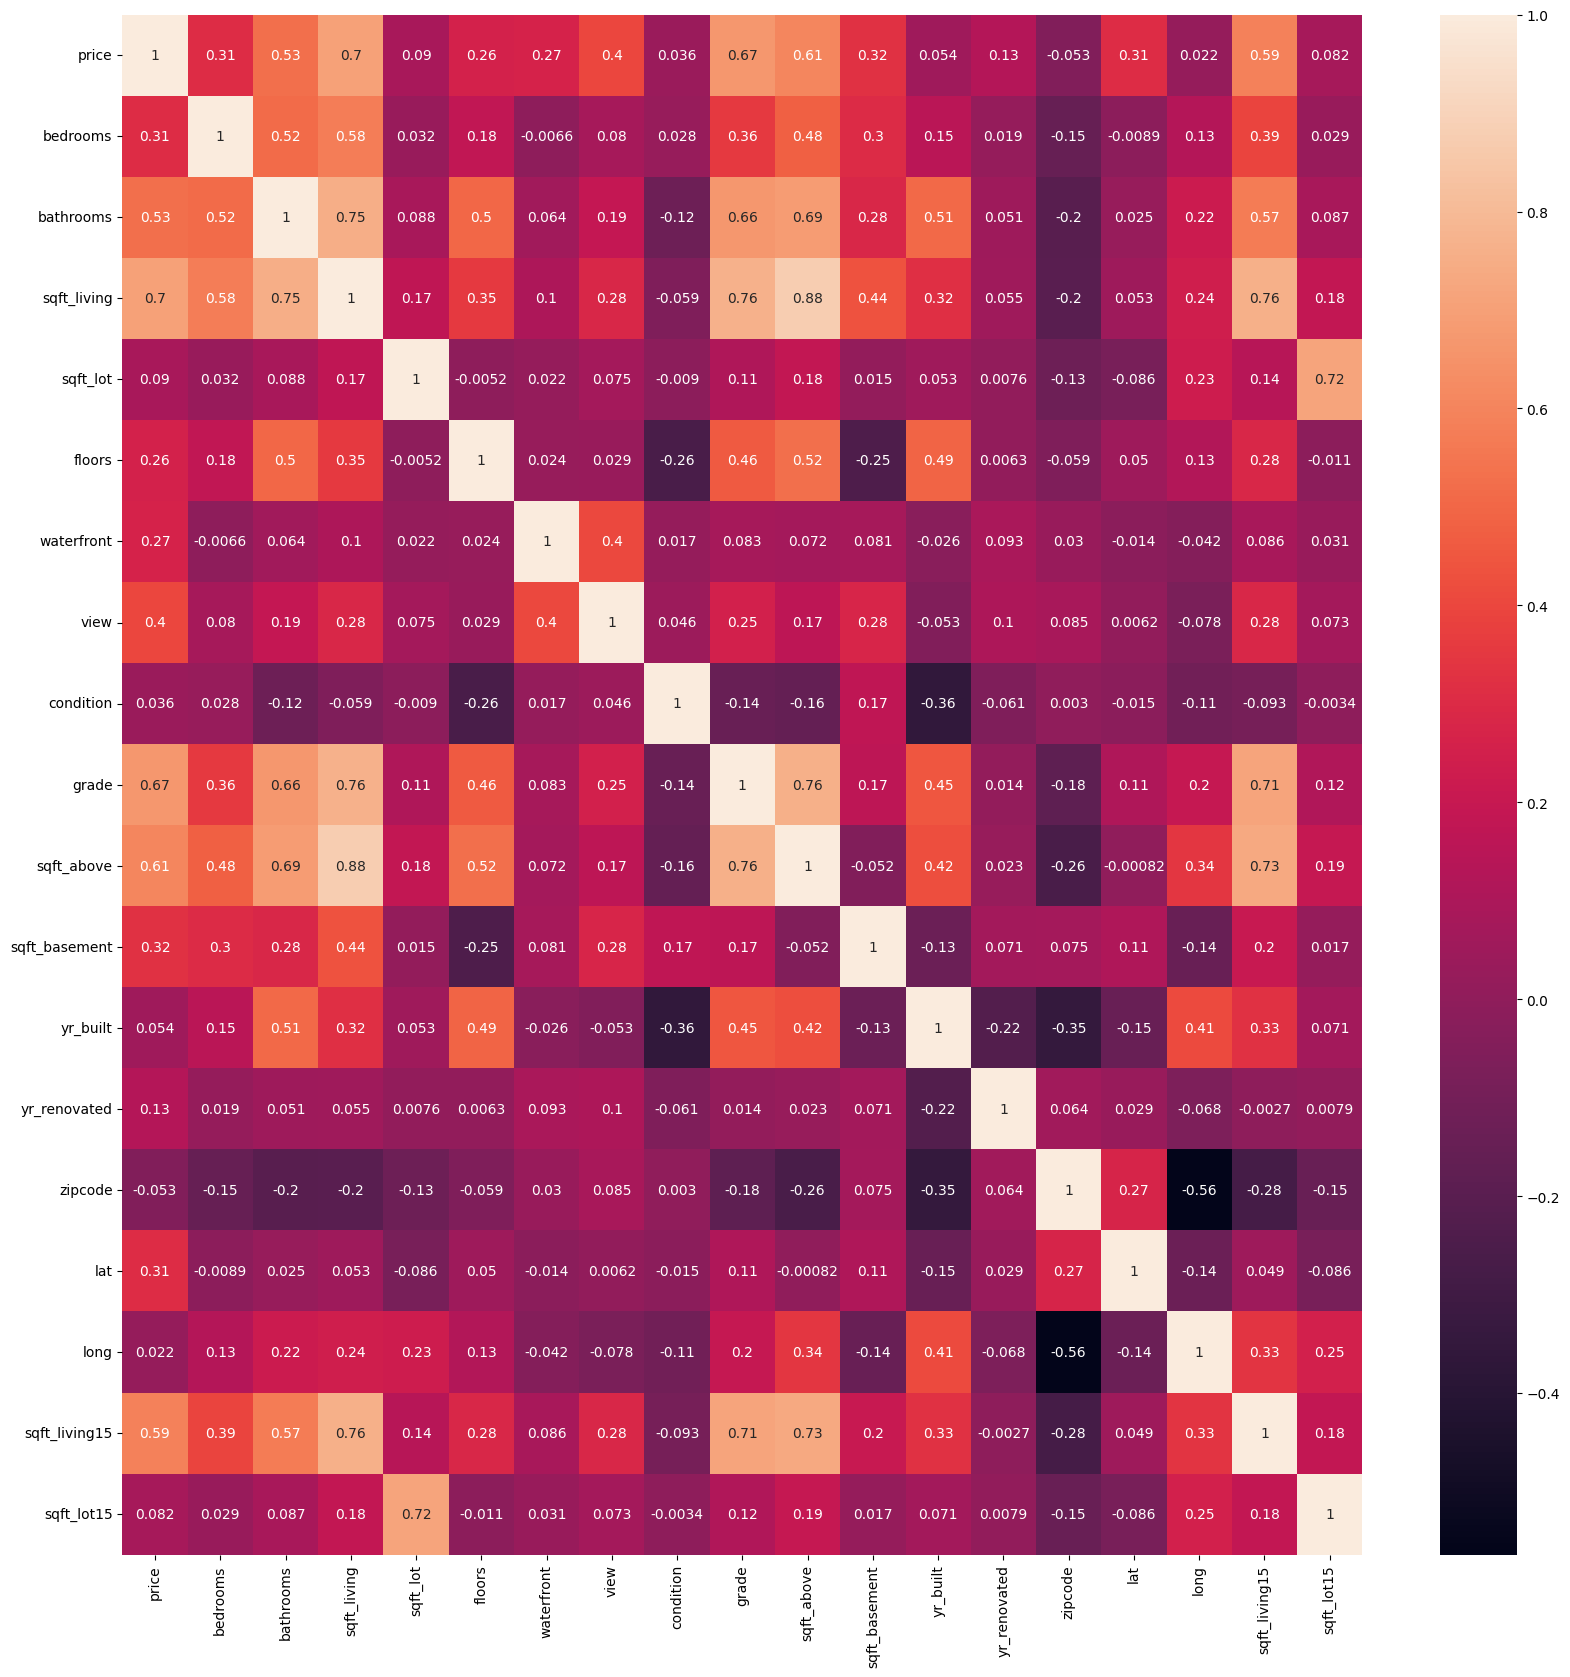

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,2:].corr(), annot=True)
#if value is closer to 1, the stronger the relationship. ANything that is between -3 and -0.3 is 

In [20]:
df['date'] = pd.to_datetime(df['date'])
#date formatting

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<Axes: ylabel='bathrooms'>

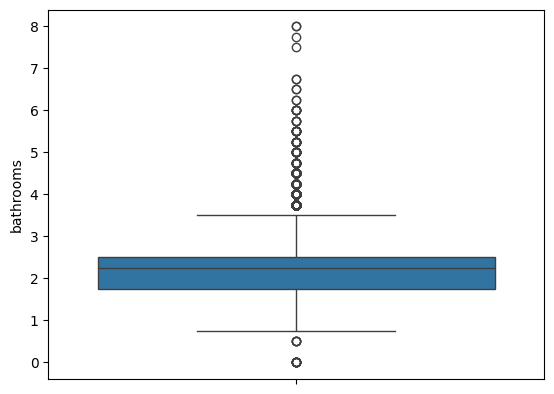

In [22]:
#points to determine outliers with a box-plot. Represents quartiles of the data.
#whisker line (min&max)
#boxplot to see how many outliers there are
sns.boxplot(df['bathrooms'])

In [24]:
#techniques for data analysis
#Analyze outliers to understand. Do not drop outliers depending on the 
#winsorization is used for extreme values - eg replace the extreme values with 3.5
df[df['bathrooms'] > 3.75 ].describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4.020000e+02,402,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,...,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,3.879148e+09,2014-10-20 15:31:20.597015040,1.534396e+06,4.815920,4.468905,4640.258706,34981.236318,1.971393,0.054726,0.990050,...,9.990050,3836.181592,804.077114,1987.238806,184.037313,98064.599502,47.594402,-122.178682,3155.203980,27289.957711
min,4.200013e+07,2014-05-05 00:00:00,2.650000e+05,3.000000,4.000000,1390.000000,1569.000000,1.000000,0.000000,0.000000,...,7.000000,900.000000,0.000000,1900.000000,0.000000,98002.000000,47.263000,-122.416000,1100.000000,1560.000000
25%,1.534989e+09,2014-07-09 06:00:00,8.659250e+05,4.000000,4.000000,3770.000000,7767.750000,2.000000,0.000000,0.000000,...,9.000000,2967.000000,0.000000,1978.000000,0.000000,98027.000000,47.550525,-122.286750,2340.000000,7561.000000
50%,3.314390e+09,2014-10-07 00:00:00,1.265390e+06,5.000000,4.250000,4430.000000,12541.000000,2.000000,0.000000,0.000000,...,10.000000,3765.000000,790.000000,1999.000000,0.000000,98052.000000,47.602350,-122.203500,3225.000000,11019.500000
75%,6.070925e+09,2015-01-26 00:00:00,1.915000e+06,5.000000,4.500000,5308.750000,24077.250000,2.000000,0.000000,2.000000,...,11.000000,4500.000000,1320.000000,2006.000000,0.000000,98105.000000,47.648875,-122.079000,3915.000000,19176.250000
max,9.822700e+09,2015-05-12 00:00:00,7.700000e+06,10.000000,8.000000,13540.000000,871200.000000,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2014.000000,98199.000000,47.768000,-121.775000,6210.000000,871200.000000
std,2.779870e+09,NaN,1.032948e+06,1.087652,0.612853,1458.630447,82366.003836,0.414576,0.227729,1.440387,...,1.469524,1279.823351,818.066863,27.797499,578.761496,51.867338,0.093310,0.134404,1005.045019,71035.431014


In [25]:
luxury_homes = df[df['bathrooms'] > 3.75 ]

In [27]:
luxury_homes.index

Index([    5,    75,   235,   270,   300,   419,   450,   471,   527,   571,
       ...
       21485, 21486, 21494, 21501, 21506, 21520, 21532, 21551, 21561, 21576],
      dtype='int64', length=402)

In [29]:
df_no_luxury = df.drop(luxury_homes.index)

In [30]:
df_no_luxury

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [32]:
df_no_luxury[df_no_luxury['bedrooms'] > 5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
209,6300000550,2014-07-17,464000.0,6,3.00,2300,3404,2.0,0,0,...,7,1600,700,1920,1994,98133,47.7067,-122.343,1560,1312
232,9264902050,2014-11-21,315000.0,6,2.75,2940,7350,1.0,0,0,...,8,1780,1160,1978,0,98023,47.3103,-122.339,2120,8236
239,5152100060,2014-05-29,472000.0,6,2.50,4410,14034,1.0,0,2,...,9,2350,2060,1965,0,98003,47.3376,-122.324,2600,13988
331,2946001550,2015-04-16,279000.0,6,1.75,2240,11180,2.0,0,0,...,7,2240,0,1955,0,98198,47.4200,-122.323,1590,7955
486,9286000240,2014-07-11,1067000.0,6,3.50,4860,11793,2.0,0,0,...,11,3860,1000,1998,0,98006,47.5521,-122.137,3600,11793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20518,3232200085,2015-04-28,1500000.0,6,3.50,3670,3959,2.0,0,0,...,10,2410,1260,2008,0,98119,47.6356,-122.373,2060,3625
20873,8946390040,2014-05-08,375000.0,6,2.25,3206,5793,2.0,0,0,...,7,3206,0,2012,0,98032,47.3690,-122.287,2527,5804
21085,4449800480,2015-03-18,677790.0,6,3.00,2800,4213,2.0,0,0,...,8,2800,0,1998,0,98117,47.6892,-122.389,1440,3960
21375,6061500100,2014-07-17,1174660.0,6,3.50,4310,7760,2.0,0,0,...,10,3260,1050,2013,0,98059,47.5297,-122.155,4620,10217


In [34]:
from scipy import stats

In [39]:
#example of winsorisation
df_no_luxury['bedrooms_winsorized'] = stats.mstats.winsorize(df_no_luxury['bedrooms'], limits=[0.01,0.99])

In [40]:
df_no_luxury[['bedrooms','bedrooms_winsorized']]

,bedrooms,bedrooms_winsorized
0,3,2
1,3,2
2,2,2
3,4,2
4,3,2
...,...,...
21608,3,2
21609,4,2
21610,2,2
21611,3,2


In [41]:
df_no_luxury['sqft_living_winsorized'] = stats.mstats.winsorize(df_no_luxury['sqft_living'], limits=[0,0.01])

In [44]:
df_no_luxury['change'] = df_no_luxury['sqft_living_winsorized'] - df_no_luxury['sqft_living']

In [45]:
df_no_luxury[df_no_luxury['change'] != 0][['sqft_living','sqft_living_winsorized']]

,sqft_living,sqft_living_winsorized
70,4770,4440
153,5180,4440
269,5050,4440
384,4800,4440
436,4870,4440
...,...,...
21467,5230,4440
21521,5150,4440
21530,5090,4440
21590,4910,4440


In [46]:
#extracting values from dates
df_no_luxury['sale_month'] = df_no_luxury['date'].apply(lambda x: x.month)

In [47]:
df_no_luxury

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,bedroom_winsorization,bedrooms_winsorized,sqft_living_winsorized,change,sale_month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2,2,1180,0,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2,2,2570,0,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2,2,770,0,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2,2,1960,0,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2,2,1680,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,98103,47.6993,-122.346,1530,1509,2,2,1530,0,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,98146,47.5107,-122.362,1830,7200,2,2,2310,0,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,98144,47.5944,-122.299,1020,2007,2,2,1020,0,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,98027,47.5345,-122.069,1410,1287,2,2,1600,0,1


<Axes: >

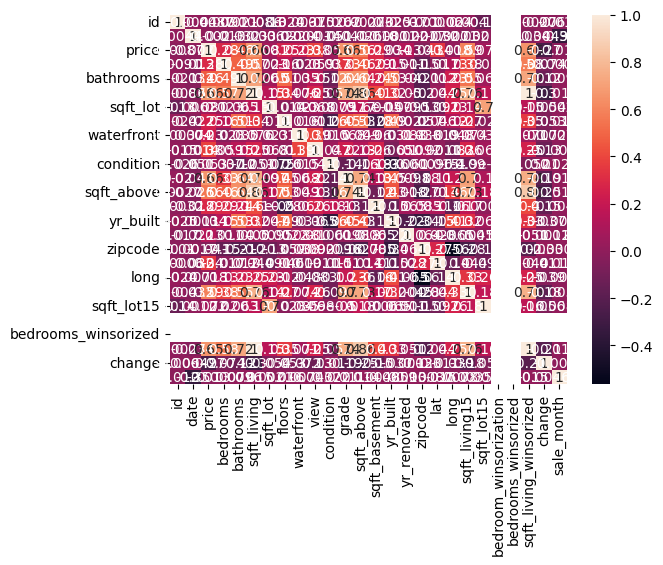

In [48]:
sns.heatmap(df_no_luxury.corr(), annot=True)

<Axes: xlabel='grade', ylabel='price'>

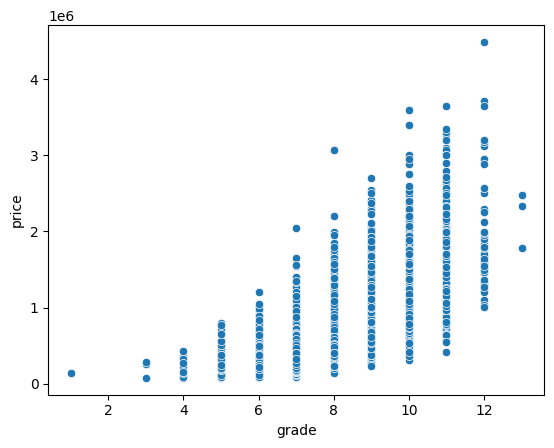

In [49]:
sns.scatterplot(x=df_no_luxury['grade'], y=df_no_luxury['price'])